# 3.1 线性回归

# 3.1.1 线性回归的基本元素

3.1.1.1 线性模型

3.1.1.2 损失函数


3.1.1.3 解析解

3.1.1.4 随机梯度下降

3.1.1.5 用模型进行预测

# 3.1.2 矢量化加速

In [2]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [3]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [4]:
class Timer: #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        """start the timer"""
        self.tik = time.time()
    
    def stop(self):
        """stop the timer and record gap in times"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """return average times"""
        return sum(self.times) / len(self.times)
    
    def sum(self):
        """return sum of times"""
        return sum(self.times)
    
    def cumsum(self):
        """逐个累加时间"""
        return np.array(self.times).cumsum().tolist()

In [5]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.13566 sec'

In [6]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00323 sec'

# 3.1.3 正态分布与平方损失

In [7]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

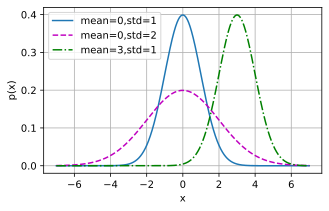

In [8]:
# 可视化
x = np.arange(-7, 7, 0.01)

# 不同均值和标准差
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], 'x', 'p(x)', \
         legend=[f'mean={mu},std={sigma}' for mu, sigma in params], figsize=(5, 3))

# 3.1.4 从线性回归到深度网络

3.1.4.1 神经网络图

3.1.4.2 生物学

# 3.1.5 小结

# 3.1.6 练习

1. b = sum(x)      
x一般认为服从均值sum(x)，方差var(x, ddof=1)的正态分布    
一般我们可以根据这些对参数b进行推断，预估等，求取估计值或者估计区间
